In [5]:
import pandas as pd
import re
import string
import emoji
import spacy

nlp = spacy.load("es_core_news_sm")

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
data_dir = '../data/'

In [7]:
aggrev = pd.read_csv(data_dir + 'clean_train_aggressiveness.csv')

In [8]:
face = pd.read_csv(data_dir + 'clean_comentarios_facebook.csv', encoding='utf-8')

In [9]:
def plot_cloud_word(text):
    stopwords = set(STOPWORDS)
    stopwords.update([])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [10]:
def num_stop_words(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.is_stop]
    return len(tokens)

# Initial EDA

In [11]:
aggrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332 entries, 0 to 7331
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  7332 non-null   int64 
 1   Text      7323 non-null   object
dtypes: int64(1), object(1)
memory usage: 114.7+ KB


In [12]:
face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1959 non-null   object
 1   Category  1968 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.9+ KB


In [13]:
aggrev['Text'] = aggrev['Text'].astype(str)
face['Text'] = face['Text'].astype(str)

## Distribución de Category

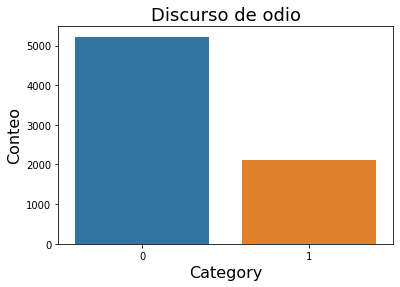

In [14]:
sns.countplot(x="Category", data=aggrev);
plt.title('Discurso de odio', fontsize=18);
plt.xlabel('Category', fontsize=16);
plt.ylabel('Conteo', fontsize=16);

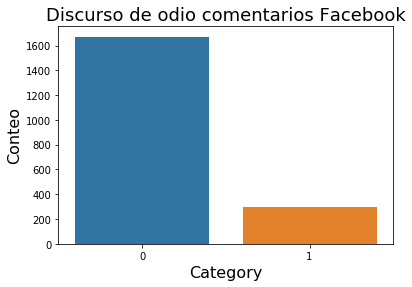

In [15]:
sns.countplot(x="Category", data=face);
plt.title('Discurso de odio comentarios Facebook', fontsize=18);
plt.xlabel('Category', fontsize=16);
plt.ylabel('Conteo', fontsize=16);

In [16]:
long_discurso_odio = aggrev[aggrev['Category']==1]['Text'].str.len()
long_no_discurso_odio = aggrev[aggrev['Category']==0]['Text'].str.len()

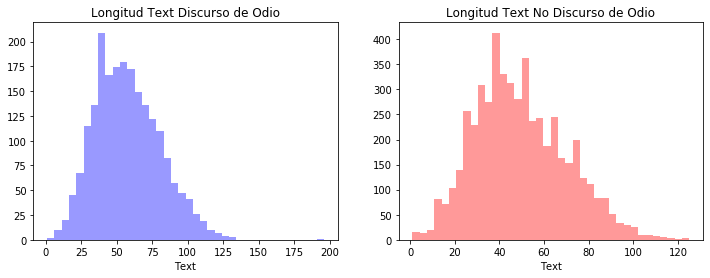

In [17]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(long_discurso_odio, kde=False, color='blue', ax=axes[0]).set_title('Longitud Text Discurso de Odio');
sns.distplot(long_no_discurso_odio, kde=False, color='red', ax=axes[1]).set_title('Longitud Text No Discurso de Odio');

In [18]:
long_discurso_odio = face[face['Category']==1]['Text'].str.len()
long_no_discurso_odio = face[face['Category']==0]['Text'].str.len()

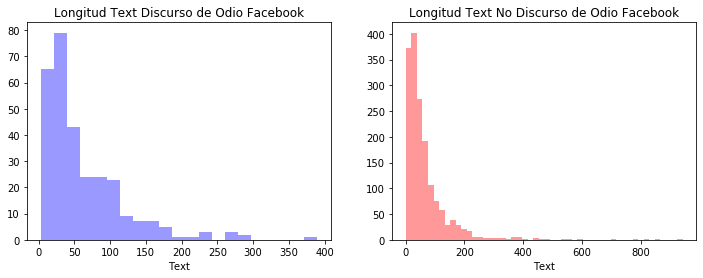

In [19]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(long_discurso_odio, kde=False, color='blue', ax=axes[0]).set_title('Longitud Text Discurso de Odio Facebook');
sns.distplot(long_no_discurso_odio, kde=False, color='red', ax=axes[1]).set_title('Longitud Text No Discurso de Odio Facebook');

## Número de palabras

In [20]:
num_palabras_discurso_odio = aggrev[aggrev['Category']==1]['Text'] \
                            .str.split().map(lambda x: len(x))

num_palabras_no_discurso_odio = aggrev[aggrev['Category']==0]['Text'] \
                            .str.split().map(lambda x: len(x))

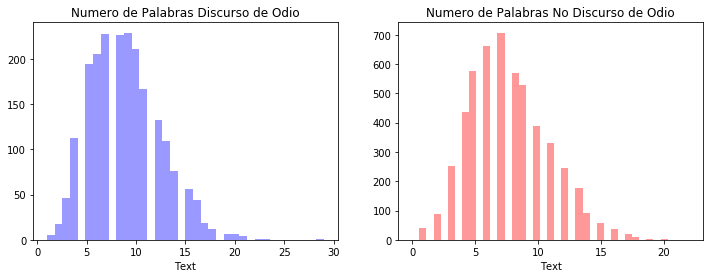

In [21]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(num_palabras_discurso_odio, kde=False, color='blue', ax=axes[0]).set_title('Numero de Palabras Discurso de Odio');

sns.distplot(num_palabras_no_discurso_odio, kde=False, color='red', ax=axes[1]).set_title('Numero de Palabras No Discurso de Odio');

In [22]:
num_palabras_discurso_odio = face[face['Category']==1]['Text'] \
                            .str.split().map(lambda x: len(x))

num_palabras_no_discurso_odio = face[face['Category']==0]['Text'] \
                            .str.split().map(lambda x: len(x))

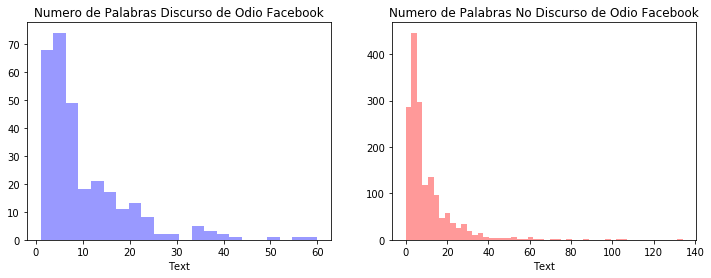

In [23]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(num_palabras_discurso_odio, kde=False, color='blue', ax=axes[0]).set_title('Numero de Palabras Discurso de Odio Facebook');

sns.distplot(num_palabras_no_discurso_odio, kde=False, color='red', ax=axes[1]).set_title('Numero de Palabras No Discurso de Odio Facebook');

## Número de palabras únicas

In [24]:
num_palabras_unicas_discurso_odio = aggrev[aggrev['Category'] == 1]['Text'].apply(lambda x: len(set(str(x).split())))
num_palabras_unicas_no_discurso_odio = aggrev[aggrev['Category'] == 0]['Text'].apply(lambda x: len(set(str(x).split())))

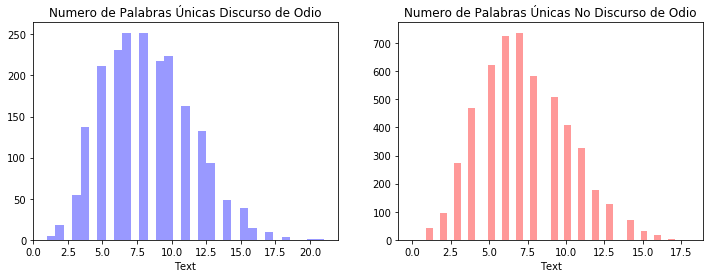

In [25]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(num_palabras_unicas_discurso_odio, kde=False, color='blue', ax=axes[0]).set_title('Numero de Palabras Únicas Discurso de Odio');
sns.distplot(num_palabras_unicas_no_discurso_odio, kde=False, color='red', ax=axes[1]).set_title('Numero de Palabras Únicas No Discurso de Odio');

In [26]:
num_palabras_unicas_discurso_odio = face[face['Category'] == 1]['Text'].apply(lambda x: len(set(str(x).split())))
num_palabras_unicas_no_discurso_odio = face[face['Category'] == 0]['Text'].apply(lambda x: len(set(str(x).split())))

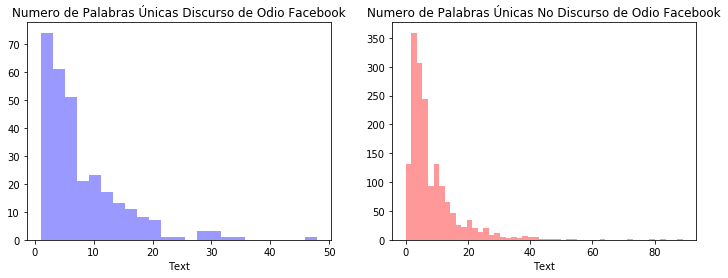

In [27]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(num_palabras_unicas_discurso_odio, kde=False, color='blue', ax=axes[0]).set_title('Numero de Palabras Únicas Discurso de Odio Facebook');
sns.distplot(num_palabras_unicas_no_discurso_odio, kde=False, color='red', ax=axes[1]).set_title('Numero de Palabras Únicas No Discurso de Odio Facebook');

## Palabras comunes

### No discurso odio dataset paper

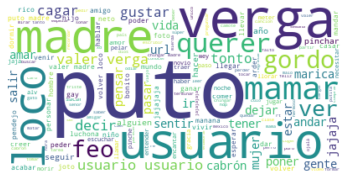

In [28]:
no_discurso_odio = aggrev[aggrev.Category == 0]
no_discurso_odio_txt = " ".join(comment for comment in no_discurso_odio.Text)
plot_cloud_word(no_discurso_odio_txt)

### Discurso odio paper

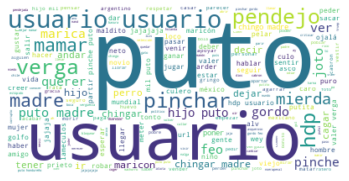

In [29]:
discurso_odio = aggrev[aggrev.Category == 1]
discurso_odio_txt = " ".join(comment for comment in discurso_odio.Text)
plot_cloud_word(discurso_odio_txt)

### No discurso odio Facebook

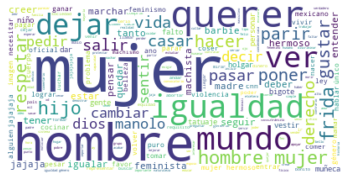

In [30]:
no_discurso_odio = face[face.Category == 0]
no_discurso_odio_txt = " ".join(comment for comment in no_discurso_odio.Text)
plot_cloud_word(no_discurso_odio_txt)

### Discurso odio Facebook

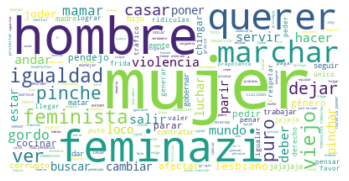

In [31]:
discurso_odio = face[face.Category == 1]
discurso_odio_txt = " ".join(comment for comment in discurso_odio.Text)
plot_cloud_word(discurso_odio_txt)